# Data Collection

In [14]:
import os
dataset_path = "Monkeypox Skin Image Dataset"

class_names = os.listdir(dataset_path)
print("Class names:", class_names)

Class names: ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']


In [15]:
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        count = 0
        for img in os.listdir(class_path):
            count = count + 1

        print(class_name, ":", count, "images")

Chickenpox : 107 images
Measles : 91 images
Monkeypox : 279 images
Normal : 293 images


# Data Preprocessing

In [16]:
# Split the dataset into three parameters like train, validation and test for building the model
# save it into output folder
import random
import shutil

output_path = "E:\MaxGen\Deep Learning\MPDD\output"

train_ratio = 0.7
test_ratio = 0.1
val_ratio = 0.2

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)


    if os.path.isdir(class_path):

        images = os.listdir(class_path)
        random.shuffle(images)

        total = len(images)
        train_end = int(total * train_ratio)
        val_end = train_end + int(total * val_ratio)

        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]


        for folder in ['train', 'val', 'test']:
            os.makedirs(os.path.join(output_path, folder, class_name), exist_ok=True)

        for img in train_images:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(output_path, 'train', class_name, img)
                
            )

        for img in test_images:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(output_path, 'val', class_name, img)
            )

        for img in test_images:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(output_path, 'test', class_name, img)
            )

        print(class_name, "-> Train: ", len(train_images),
              "Val:", len(val_images),
              "Test:", len(test_images)
             )

Chickenpox -> Train:  74 Val: 21 Test: 12
Measles -> Train:  63 Val: 18 Test: 10
Monkeypox -> Train:  195 Val: 55 Test: 29
Normal -> Train:  205 Val: 58 Test: 30


# Data Augmentation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/working/output_dataset/train'
val_dir = '/kaggle/working/output_dataset/val'
test_dir = '/kaggle/working/output_dataset/test'

img_size = (224,224)
batch_size = 32

In [18]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)


In [19]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 537 images belonging to 4 classes.
Found 81 images belonging to 4 classes.
Found 81 images belonging to 4 classes.


# Model Building

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 224
img_width = 224
batch_size = 32
num_classes = 4

In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu",
                 input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation="softmax"))


In [22]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [11]:

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
17/17 [==============================] - 24s 1s/step - loss: 2.0408 - accuracy: 0.3706 - val_loss: 1.2345 - val_accuracy: 0.3704
Epoch 2/10
17/17 [==============================] - 20s 1s/step - loss: 1.2229 - accuracy: 0.4786 - val_loss: 1.1542 - val_accuracy: 0.4691
Epoch 3/10
17/17 [==============================] - 19s 1s/step - loss: 1.1419 - accuracy: 0.5345 - val_loss: 1.1038 - val_accuracy: 0.4938
Epoch 4/10
17/17 [==============================] - 21s 1s/step - loss: 1.1168 - accuracy: 0.5475 - val_loss: 1.1329 - val_accuracy: 0.5309
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 1.0741 - accuracy: 0.5475 - val_loss: 1.0146 - val_accuracy: 0.5926
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 1.0562 - accuracy: 0.5698 - val_loss: 0.9563 - val_accuracy: 0.6173
Epoch 7/10
17/17 [==============================] - 17s 964ms/step - loss: 1.0568 - accuracy: 0.5587 - val_loss: 0.9607 - val_accuracy: 0.6420
Epoch 8/10
17/17 

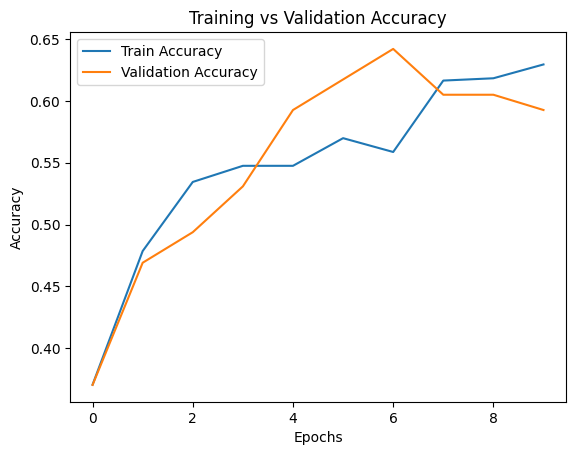

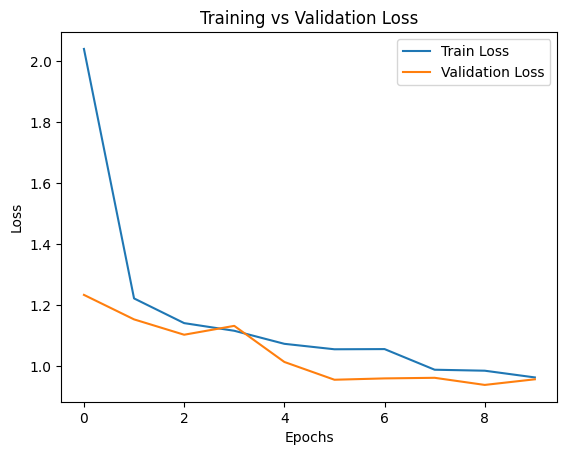

In [13]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.title("Training vs Validation Loss")
plt.show()


# Save Sequential Model

In [16]:
model.save("E:\MaxGen\Deep Learning\MPDD\Models\cnn_mpdd62%_model.keras")

# Prediction of 62% Train Model


In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from ipywidgets import FileUpload
from PIL import Image

In [45]:
from keras.models import load_model
model = load_model("E:\MaxGen\Deep Learning\MPDD\Models\cnn_mpdd62%_model.keras")

In [46]:
class_names = list(test_data.class_indices.keys())
print("Class names:", class_names)

Class names: ['Measles', 'Monkeypox', 'Normal', 'chickenpox']


In [47]:
def predict_image_from_path(img_path):
    # Load image
    img = Image.open(img_path).convert("RGB")

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Preprocess
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    class_index = np.argmax(predictions)

    print("Predicted Class :", class_names[class_index])
    print("Confidence     :", round(confidence * 100, 2), "%")

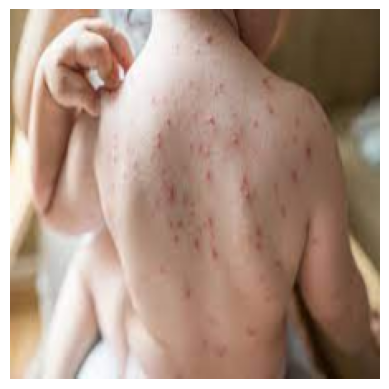

1/1 [==============================] - 0s 129ms/step
Predicted Class : Monkeypox
Confidence     : 38.6 %


In [48]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Chickenpox\\chickenpox1.png"
predict_image_from_path(image_path)

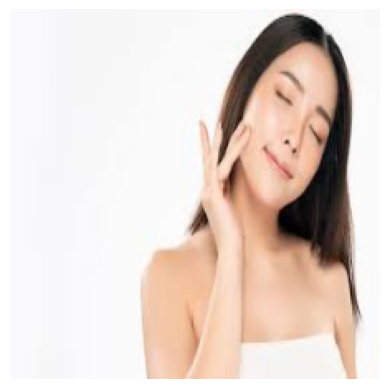

1/1 [==============================] - 0s 40ms/step
Predicted Class : Normal
Confidence     : 94.35 %


In [49]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Normal\\normal3.png"
predict_image_from_path(image_path)

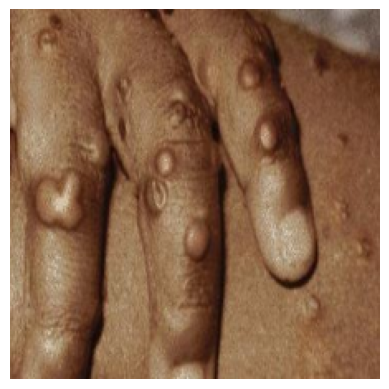

1/1 [==============================] - 0s 40ms/step
Predicted Class : Monkeypox
Confidence     : 48.16 %


In [50]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Monkeypox\\monkeypox5.png"
predict_image_from_path(image_path)

In [51]:
# Apply an optimizer to the existing CNN and recompile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled with optimizer:", optimizer._name, "lr=", optimizer.learning_rate.numpy())

Model compiled with optimizer: Adam lr= 1e-04


In [52]:
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
17/17 [==============================] - 18s 980ms/step - loss: 0.9038 - accuracy: 0.6574 - val_loss: 0.8874 - val_accuracy: 0.6173
Epoch 2/10
17/17 [==============================] - 16s 941ms/step - loss: 0.8912 - accuracy: 0.6648 - val_loss: 0.8894 - val_accuracy: 0.6296
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.8583 - accuracy: 0.6574 - val_loss: 0.8821 - val_accuracy: 0.6296
Epoch 4/10
17/17 [==============================] - 17s 962ms/step - loss: 0.8868 - accuracy: 0.6443 - val_loss: 0.9262 - val_accuracy: 0.6173
Epoch 5/10
17/17 [==============================] - 17s 967ms/step - loss: 0.8744 - accuracy: 0.6536 - val_loss: 0.8968 - val_accuracy: 0.6420
Epoch 6/10
17/17 [==============================] - 16s 928ms/step - loss: 0.8715 - accuracy: 0.6611 - val_loss: 0.8799 - val_accuracy: 0.6420
Epoch 7/10
17/17 [==============================] - 16s 910ms/step - loss: 0.8923 - accuracy: 0.6574 - val_loss: 0.9058 - val_accuracy: 0.6296
Ep

In [53]:
model.save("E:/MaxGen/Deep Learning/MPDD\Models\cnn_mpdd67%_optimized_model.keras")

In [55]:
from keras.models import load_model
model = load_model("E:/MaxGen/Deep Learning/MPDD\Models\cnn_mpdd67%_optimized_model.keras")

In [56]:
class_names = list(test_data.class_indices.keys())
print("Class names:", class_names)

Class names: ['Measles', 'Monkeypox', 'Normal', 'chickenpox']


In [57]:
def predict_image_from_path(img_path):
    # Load image
    img = Image.open(img_path).convert("RGB")

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Preprocess
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    class_index = np.argmax(predictions)

    print("Predicted Class :", class_names[class_index])
    print("Confidence     :", round(confidence * 100, 2), "%")

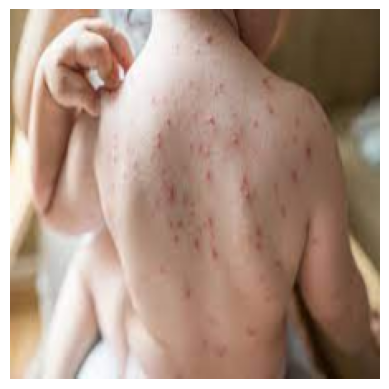

1/1 [==============================] - 0s 208ms/step
Predicted Class : Monkeypox
Confidence     : 48.72 %


In [58]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Chickenpox\\chickenpox1.png"
predict_image_from_path(image_path)

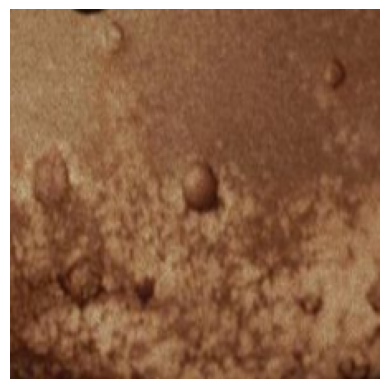

1/1 [==============================] - 0s 41ms/step
Predicted Class : Monkeypox
Confidence     : 76.2 %


In [60]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\monkeypox\\monkeypox7.png"
predict_image_from_path(image_path)

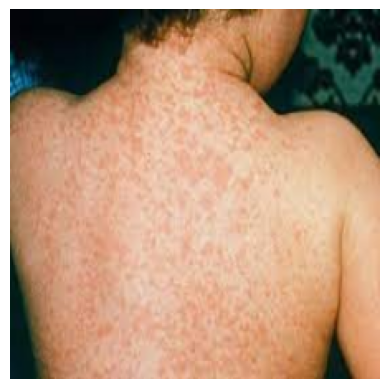

1/1 [==============================] - 0s 68ms/step
Predicted Class : Measles
Confidence     : 87.84 %


In [61]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Measles\\measles1.png"
predict_image_from_path(image_path)

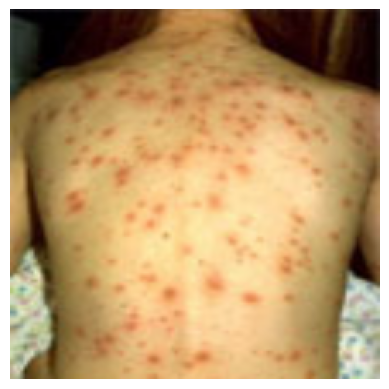

1/1 [==============================] - 0s 36ms/step
Predicted Class : Measles
Confidence     : 46.06 %


In [64]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Chickenpox\\chickenpox107.png"
predict_image_from_path(image_path)

# RestNet50

# Imports and Setup

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set the main data path and list categories (subfolders in the dataset directory)
main_path = 'E:\MaxGen\Deep Learning\MPDD\Monkeypox Skin Image Dataset'
categories = sorted(os.listdir(main_path))  # Sort for consistency
NUM_CLASSES = len(categories)             # Number of distinct categories
IMAGE_SIZE = (224, 224)                  # Image dimensions for ResNet50


# Data Loading and Preprocessing

In [3]:
# Initialize lists to hold data
X = []
y = []

# Loop over categories and images
for idx, category in enumerate(categories):
    category_path = os.path.join(main_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        # Load image (as BGR) and resize
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip unreadable files
        img = cv2.resize(img, IMAGE_SIZE)
        # Preprocess for ResNet50 (expects BGR, subtracts ImageNet mean, etc.)
        img = preprocess_input(img)
        X.append(img)
        y.append(idx)

# Convert lists to NumPy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y)  # labels as integer class indices

# One-hot encode labels
y = to_categorical(y, num_classes=NUM_CLASSES)

print(f"Total samples: {X.shape[0]}")
print(f"Image data shape: {X.shape[1:]}, Labels shape: {y.shape[1:]}")


Total samples: 770
Image data shape: (224, 224, 3), Labels shape: (4,)


# Train/Validation/Test Split

In [4]:
# First, split out validation set (10% of total data)
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X, y, test_size=0.10, random_state=42, shuffle=True
)

# Then, split the remaining 90% into train and test sets (test ~ 22% of original data)
X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full, test_size=0.22/0.90, random_state=42, shuffle=True
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 523 samples
Validation set: 77 samples
Test set: 170 samples


In [5]:
import cv2

def save_images(X, y, split_name, class_names):
    for idx, (img, label) in enumerate(zip(X, y)):
        class_name = class_names[np.argmax(label)]
        save_dir = f"output2/{split_name}/{class_name}"
        os.makedirs(save_dir, exist_ok=True)

        img_uint8 = (img * 255).astype("uint8")
        cv2.imwrite(f"{save_dir}/{idx}.jpg", img_uint8)

class_names = categories  # or train_gen.class_indices.keys()

save_images(X_train, y_train, "train", class_names)
save_images(X_val, y_val, "val", class_names)
save_images(X_test, y_test, "test", class_names)

print("✅ Images saved in output2/")


✅ Images saved in output2/


# Model Definition and Compilation

In [6]:
# Load pre-trained ResNet50 base (no top, with global average pooling)
base_model = ResNet50(weights='imagenet', include_top=False,
                      pooling='avg', input_shape=(*IMAGE_SIZE, 3))
base_model.trainable = False  # Freeze base model layers

# Build our top model
model = Sequential([
    base_model,
    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6,
                                    momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


# Callbacks

In [7]:
# Define callbacks: early stopping and model checkpointing
early_stopper = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


# Training the Model

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper, checkpoint]
)


Epoch 1/10
17/17 [==============================] - 31s 2s/step - loss: 0.7550 - accuracy: 0.7400 - val_loss: 0.3892 - val_accuracy: 0.8831
Epoch 2/10
17/17 [==============================] - 27s 2s/step - loss: 0.2549 - accuracy: 0.9140 - val_loss: 0.4333 - val_accuracy: 0.8701
Epoch 3/10
17/17 [==============================] - 26s 2s/step - loss: 0.1442 - accuracy: 0.9522 - val_loss: 0.2333 - val_accuracy: 0.8961
Epoch 4/10
17/17 [==============================] - 25s 1s/step - loss: 0.0482 - accuracy: 0.9924 - val_loss: 0.3473 - val_accuracy: 0.8571
Epoch 5/10
17/17 [==============================] - 26s 2s/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 0.2037 - val_accuracy: 0.9091
Epoch 6/10
17/17 [==============================] - 26s 2s/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.1710 - val_accuracy: 0.9481
Epoch 7/10
17/17 [==============================] - 27s 2s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.1938 - val_accuracy: 0.9221
Epoch 8/10
17/17 [==

# Plotting Training Metrics

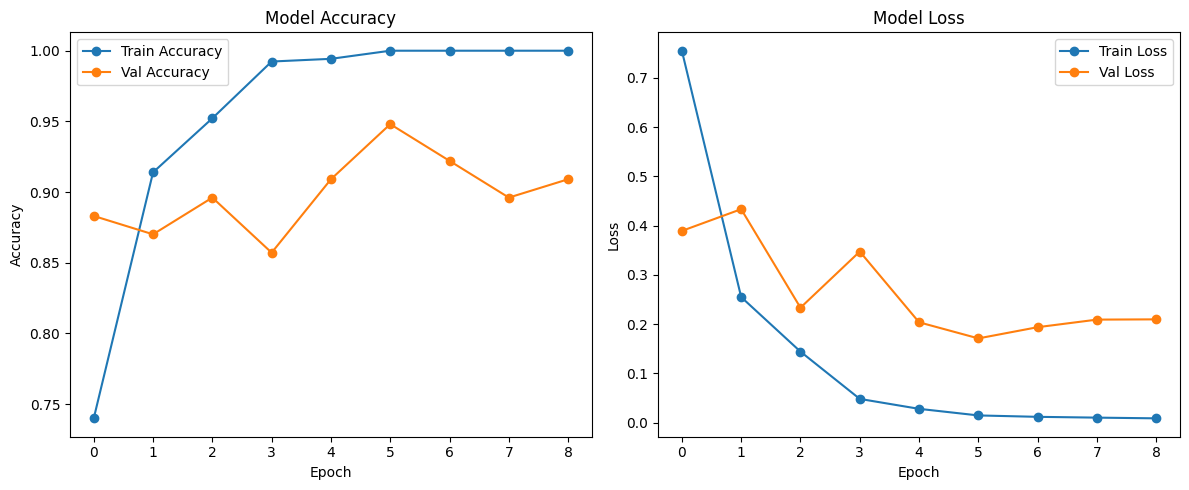

In [9]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluation on Test Set

In [10]:
# Load the best saved model (if not already loaded via EarlyStopping)
model.load_weights('best_model.h5')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 91.76%


In [15]:
from keras.models import load_model
model_path = "E:\\MaxGen\\Deep Learning\\MPDD\\best_model.h5"
model = load_model(model_path)

In [22]:
class_names = ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image_from_path(image_path, model, class_names):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("❌ Image path wrong aahe")

    # Resize
    img = cv2.resize(img, (224, 224))

    # BGR → RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize (MUST match training)
    img_norm = img_rgb / 255.0
    img_norm = np.expand_dims(img_norm, axis=0)

    # Predict
    preds = model.predict(img_norm, verbose=0)
    pred_index = np.argmax(preds)
    confidence = preds[0][pred_index] * 100

    # Show image
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(
        f"Predicted: {class_names[pred_index]}\nAccuracy: {confidence:.2f}%",
        fontsize=12
    )
    plt.show()

    # Print probabilities
    print("📊 Class-wise confidence:")
    for cls, prob in zip(class_names, preds[0]):
        print(f"{cls:15s}: {prob*100:.2f}%")


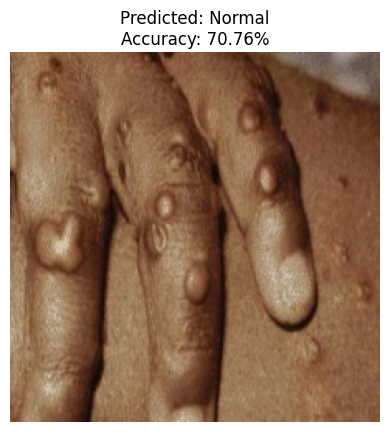

📊 Class-wise confidence:
Chickenpox     : 5.57%
Measles        : 18.58%
Monkeypox      : 5.09%
Normal         : 70.76%


In [24]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Monkeypox\\monkeypox5.png"
predict_image_from_path(image_path, model, class_names)
